<a href="https://colab.research.google.com/github/Mirabelljoicelaura/PCVK/blob/Week3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KELOMPOK 8
Nama Anggota Kelompok

1. Mirabell Joice Laura (2141720174)
2. M. Edwin Isa Alfais (2141720193)
3. Nabilah Amaalina Syafa (2141720198)



# Praktikum

In [131]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from numpy.ma.extras import average
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat  kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


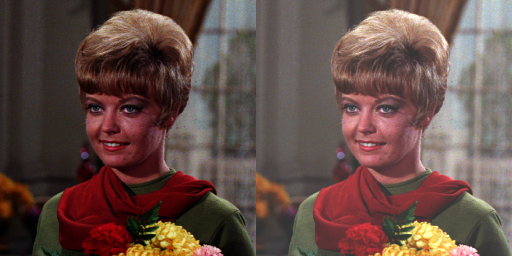

In [ ]:
print('Mengubah tingkat  kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original=cv.imread('/content/drive/MyDrive/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)

# cara simplpe tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


# Tugas Praktikum

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori,

Menginverse citra
---------------------------------


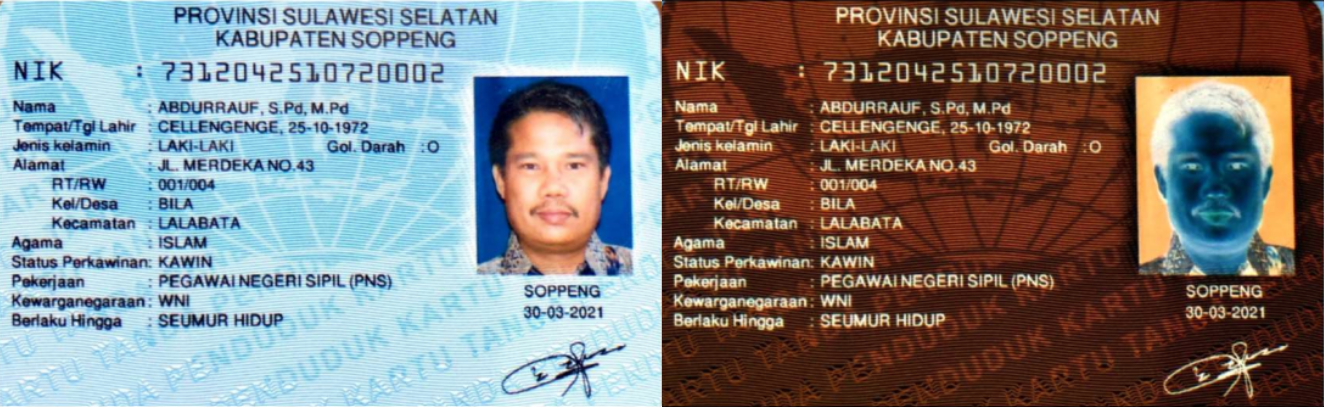

In [ ]:
print('Menginverse citra')
print('---------------------------------')

original=cv.imread('/content/drive/MyDrive/image/ktp.png')

citra_negative = np.copy(original)

citra_negative = 255 - citra_negative

final_frame = cv.hconcat((original, citra_negative))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras.

Mengganti kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan : 50
Masukkan nilai kontras (misalnya 1.5 untuk meningkatkan kontras): 2


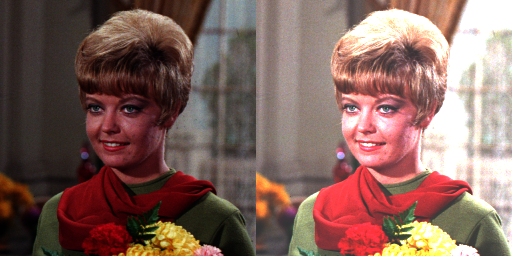

In [ ]:
print('Mengganti kontras dan tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan : '))
except ValueError:
  print('Error, not a number')

try:
    contrast = float(input('Masukkan nilai kontras (misalnya 1.5 untuk meningkatkan kontras): '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/image/female.tiff')

if original is not None:
  contrast_image = cv2.convertScaleAbs(original, alpha=contrast, beta=brightness)
  final_frame = cv2.hconcat((original, contrast_image))
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log.

Transformasi Logaritmik Kecerahan Citra
---------------------------------
Masukkan nilai kecerahan: 50


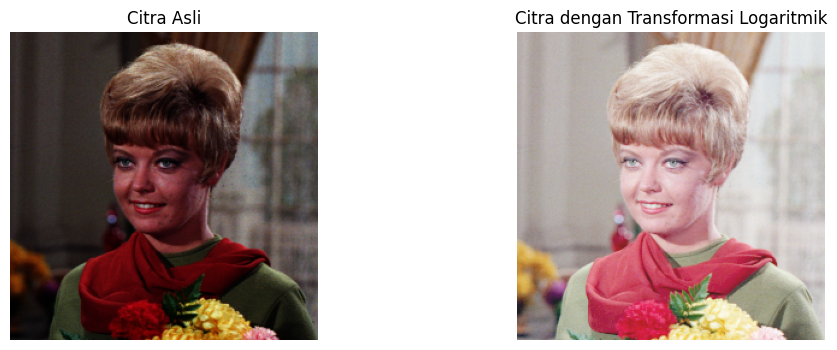

In [ ]:
print('Transformasi Logaritmik Kecerahan Citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    exit()
original = cv2.imread('/content/drive/MyDrive/image/female.tiff')

c = 255 / np.log(1 + np.max(original))
log_transformed = c * (np.log(original.astype(np.float32) + 1))
log_transformed = np.uint8(np.round(log_transformed))

brightened_image = cv.add(log_transformed, brightness)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Citra dengan Transformasi Logaritmik')
plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

A. Average

Transformasi Grayscale - Metode Averaging
---------------------------------


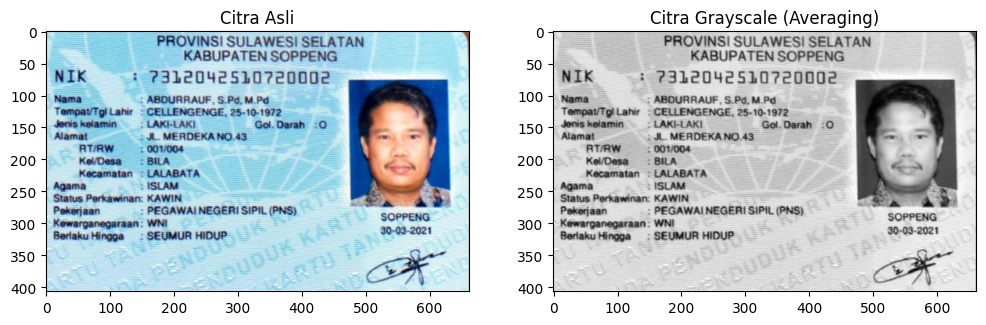

In [ ]:
print('Transformasi Grayscale - Metode Averaging')
print('---------------------------------')

original = cv2.imread('/content/drive/MyDrive/image/ktp.png')

# Ubah citra menjadi citra grayscale dengan metode averaging
grayscale_image = np.mean(original, axis=2)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')

plt.show()

B. Lightness

Transformasi Grayscale - Metode Lightness
---------------------------------


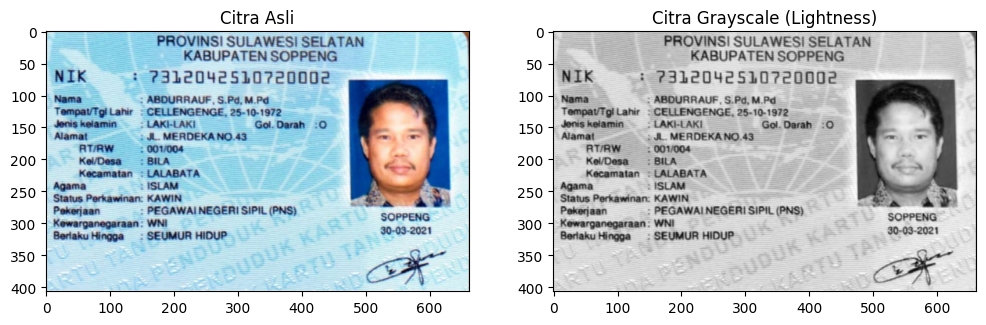

In [ ]:
print('Transformasi Grayscale - Metode Lightness')
print('---------------------------------')

original = cv2.imread('/content/drive/MyDrive/image/ktp.png')

grayscale_image = (np.max(original, axis=2))/2 + (np.min(original, axis=2)) / 2

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Lightness)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')
plt.show()

C. Luminance

Transformasi Grayscale - Metode Luminance
---------------------------------


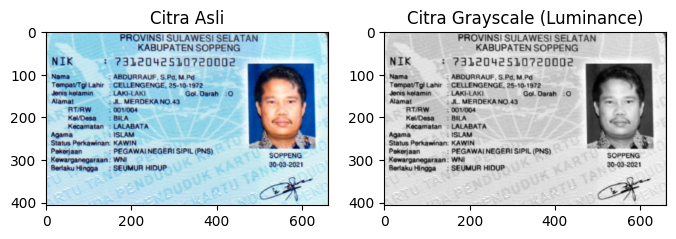

In [ ]:
print('Transformasi Grayscale - Metode Luminance')
print('---------------------------------')

original = cv2.imread('/content/drive/MyDrive/image/ktp.png')

luminance_image = (0.21 * original[:, :, 2] + 0.72 * original[:, :, 1] + 0.07 * original[:, :, 0]).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Luminance)')
plt.imshow(luminance_image, cmap='gray')
plt.axis('on')
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:*italicized text*

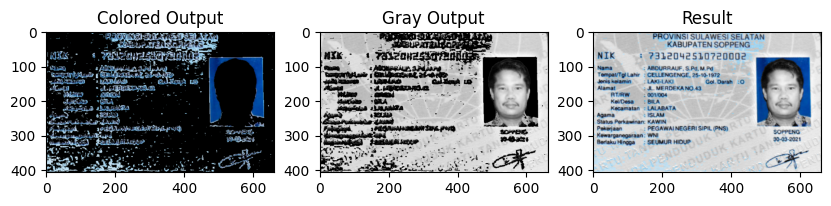

In [184]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower = np.array([100, 40, 100])
upper = np.array([120, 255, 255])

mask = cv.inRange(hsv, lower, upper)

colored_output = cv.bitwise_and(img, img, mask=mask)
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)
result = cv.add(colored_output, gray_output)

plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(colored_output, cv.COLOR_BGR2RGB))
plt.title('Colored Output')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(gray_output, cv.COLOR_BGR2RGB))
plt.title('Gray Output')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result')

plt.show()
